## Logistic Regression for Categorical Data

#### Titanic data from kaggle

In [2]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

%matplotlib inline

## Getting the data

In [3]:
train = pd.read_csv("titanic_train.csv")

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Pandas Profiling Report

In [8]:
profile = ProfileReport(train)
profile.to_file("Train_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/home/francisco/anaconda3/envs/Handbook_Python_DS/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/francisco/anaconda3/envs/Handbook_Python_DS/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/francisco/anaconda3/envs/Handbook_Python_DS/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/francisco/anaconda3/envs/Handbook_Python_DS/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### We see that are numerical and categorical data and some features (Age and Cabin) have missing values

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Data Analysis (EDA)

#### Missing Data

<AxesSubplot:>

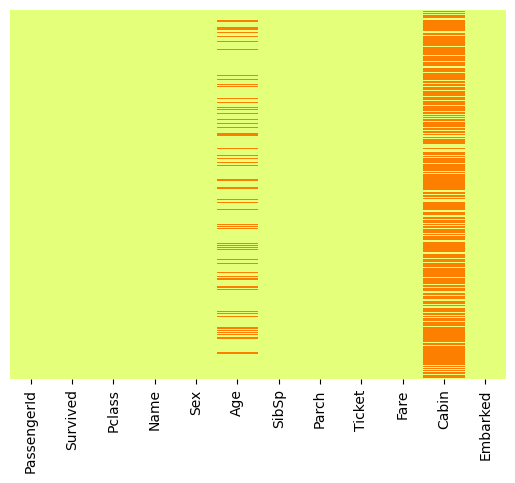

In [11]:
sns.heatmap(train.isnull(), cbar=False, cmap="Wistia", yticklabels=False)

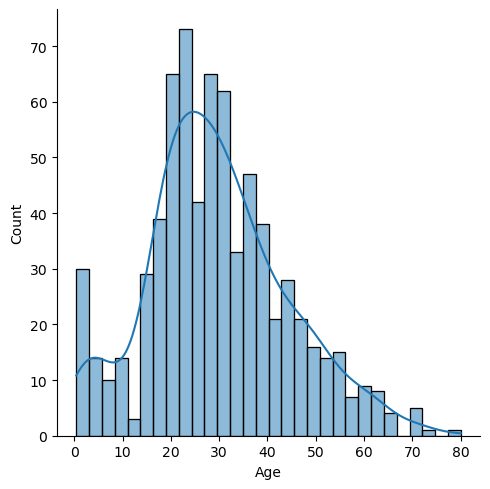

In [19]:
sns.displot(
    data=train, x="Age", bins=30, kde=True
)

<AxesSubplot:xlabel='Survived', ylabel='count'>

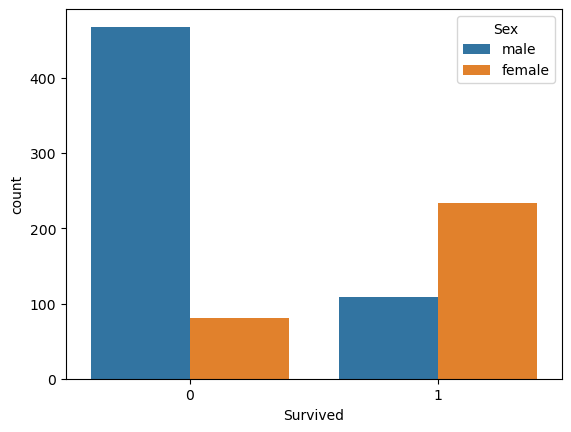

In [25]:
sns.countplot(
    data=train, x="Survived", hue="Sex"
)

<AxesSubplot:xlabel='Survived', ylabel='count'>

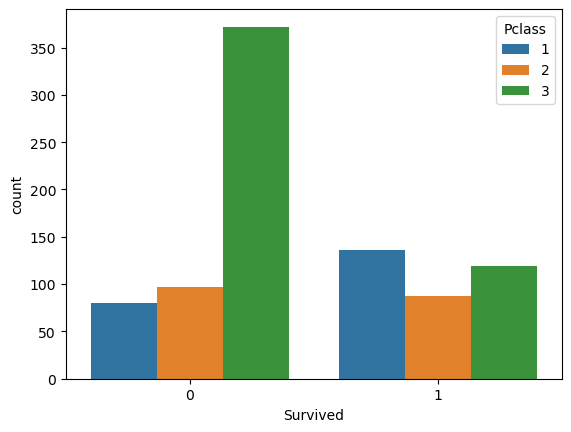

In [28]:
sns.countplot(
    data=train, x="Survived", hue="Pclass"
)

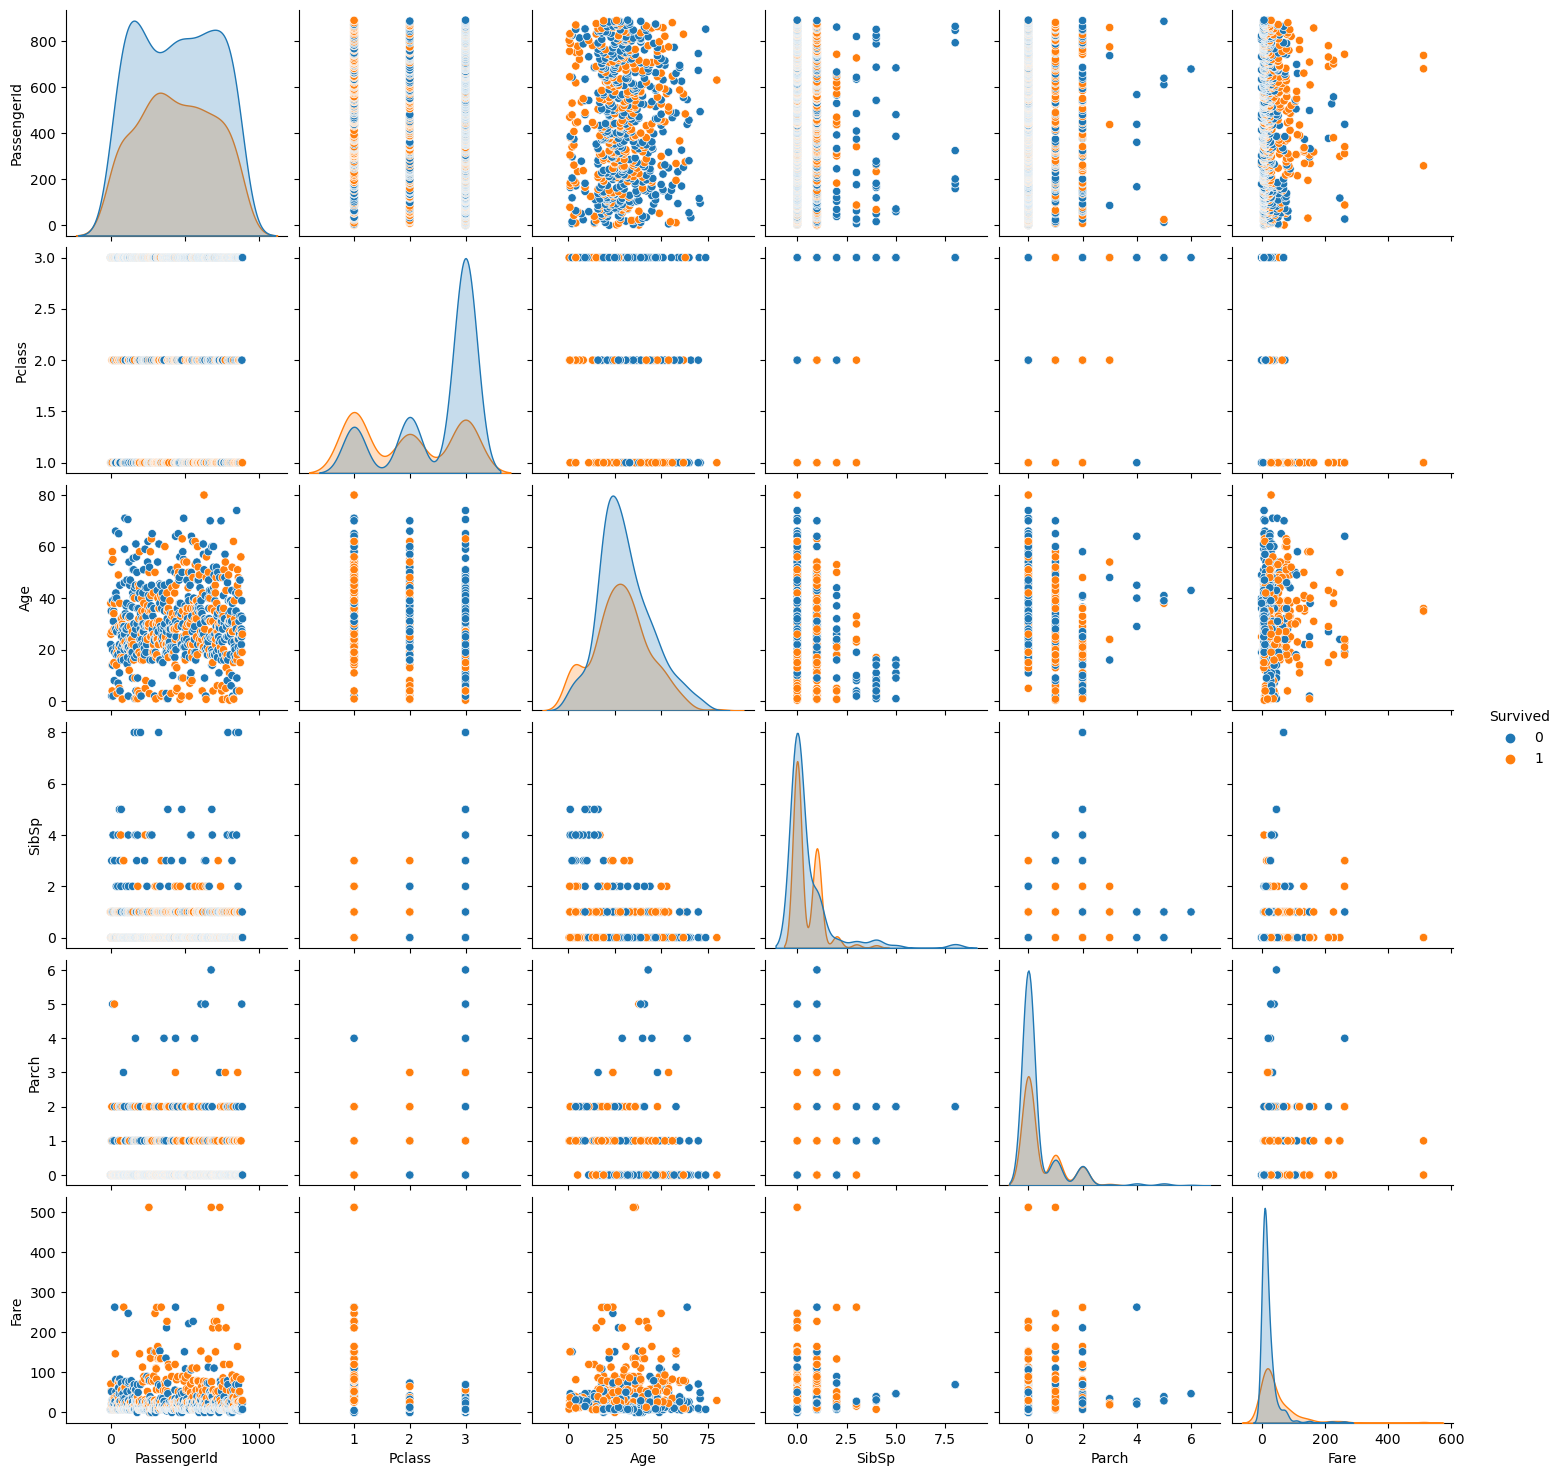

In [30]:
sns.pairplot(
    data=train, hue="Survived"
)

<AxesSubplot:>

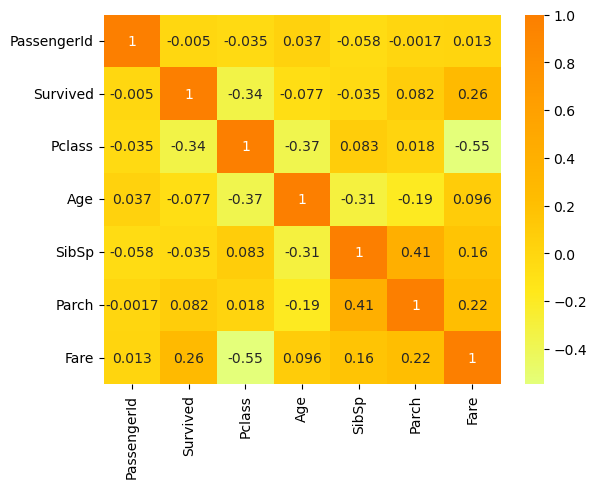

In [31]:
sns.heatmap(train.corr(), cmap="Wistia", annot=True)

<AxesSubplot:>

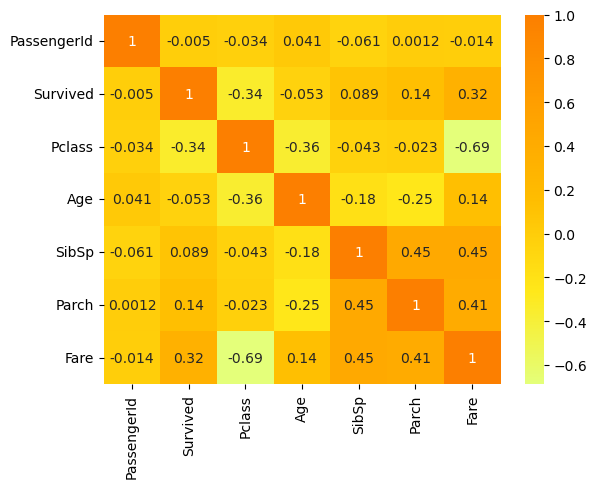

In [32]:
sns.heatmap(train.corr(method="spearman"), cmap="Wistia", annot=True)

<AxesSubplot:>

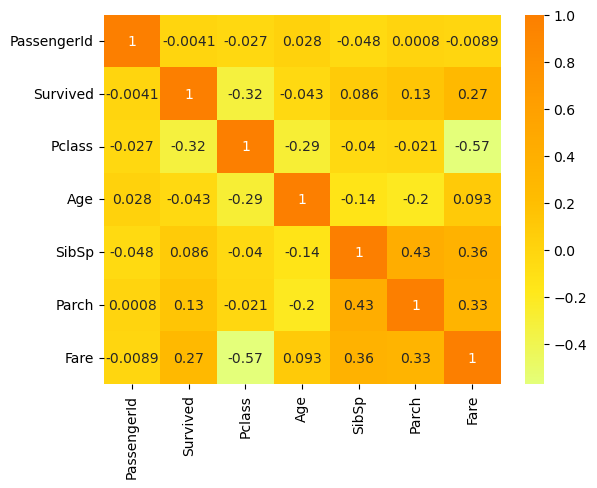

In [33]:
sns.heatmap(train.corr(method="kendall"), cmap="Wistia", annot=True)

## Data Cleaning

#### Filling the age data with the median value by class feature

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

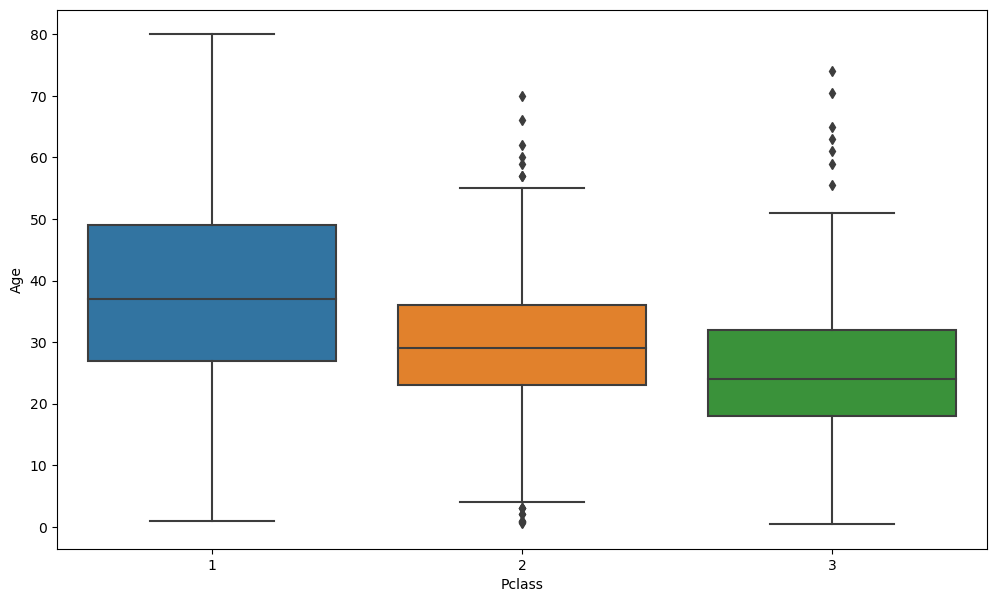

In [34]:
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=train, x="Pclass", y="Age"
)

#### Using the mean age of the classes to fill the NaN values

In [37]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24
    else:
        return Age

#### Aplying the function

In [38]:
train["Age"] = train[["Age", "Pclass"]].apply(impute_age, axis=1)

#### Checking the missing values again

<AxesSubplot:>

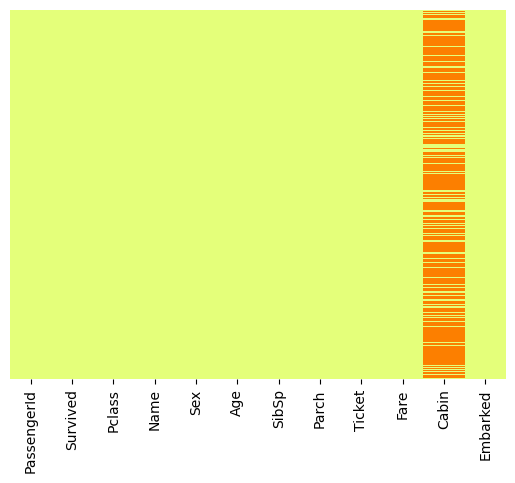

In [39]:
sns.heatmap(train.isnull(), cbar=False, cmap="Wistia", yticklabels=False)

#### Plotting the kde of "Age" again

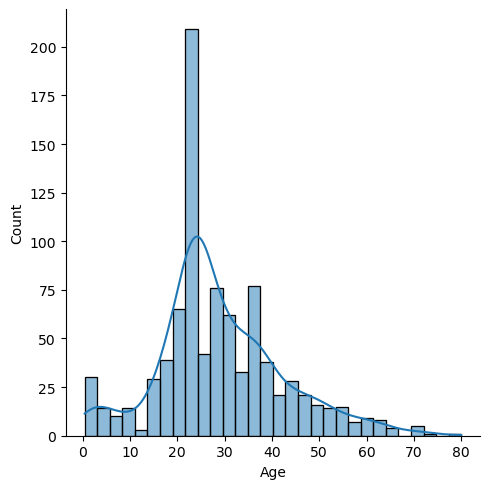

In [40]:
sns.displot(
    data=train, x="Age", bins=30, kde=True
)

#### Dropping the Cabin column by now

In [41]:
train.drop("Cabin", axis=1, inplace=True)

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### Searching remain NaN values

In [45]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

#### Dropping the NaN last values

In [46]:
train.dropna(inplace=True)

In [49]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Converting Categorical Features

#### Converting categorical features to dummy variables using pandas

#### This is necessary for the machine learning algorithm be able to directly take these features as inputs

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [51]:
sex = pd.get_dummies(train["Sex"], drop_first=True)
embark = pd.get_dummies(train["Embarked"], drop_first=True)

#### Dropping the "Sex" and "Embark" features for replacement

#### Dropping the "Name" and "Ticket" features because we will not use them by now

In [52]:
train.drop(["Sex", "Embarked", "Name", "Ticket"], axis=1, inplace=True)

In [53]:
train = pd.concat([train, sex, embark], axis=1)

In [55]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


#### We will try to predict "Survived" feature in function of the other features

#### X and Y features

In [58]:
X = train[["PassengerId", "Pclass", "Age", "SibSp", "Parch", "Fare", "male", "Q", "S"]]

y = train["Survived"]

#### Train-Test Split

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Training and Predicting

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
logmodel = LogisticRegression()

In [64]:
logmodel.fit(X_train, y_train)

/home/francisco/anaconda3/envs/Handbook_Python_DS/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
predictions = logmodel.predict(X_test)

#### Evaluate Model

In [65]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       163
           1       0.84      0.62      0.71       104

    accuracy                           0.81       267
   macro avg       0.82      0.77      0.78       267
weighted avg       0.81      0.81      0.80       267

